# Machine Learning: Assignment 2
## KMeans clustering (max. 7p)


In [64]:
# TODO: Write your information here!
student_name = 'Juuso Leppänen'
student_email = "ad1885@student.jamk.fi"

## Assignment 2.0: KMeans assignment
### Unsupervised learning
In the assignment, three (3) distinct clusters are generated using **synthetic values** of X and y coordinates.

These can be drawn in the (X,Y) coordinate system.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    """
    Calculate the mean distance of points in a cluster to its centroid.
    
    Parameters:
        data (np.array): All data points, shape (n_samples, 2)
        cx (float): x-coordinate of the centroid
        cy (float): y-coordinate of the centroid
        i_centroid (int): index of the cluster
        cluster_labels (np.array): array of cluster labels for each point
    
    Returns:
        float: mean distance of points in this cluster to the centroid
    """
    # Select points belonging to this cluster
    cluster_points = data[cluster_labels == i_centroid]
    
    # Euclidean distances from centroid
    distances = np.sqrt((cluster_points[:, 0] - cx)**2 + (cluster_points[:, 1] - cy)**2)
    
    # Return the mean distance
    return np.mean(distances)

## Assignment 2.1
### Topic: Generation of synthetic data points (2 points)

Let's generate random data into a NumPy matrix and divide the array into the four (4) cluster of points.
* Each part includes **100** coordinate pairs. 
* The total number of elements in the array is **400 coordinate pairs**.

The points are generated, for example, with NumPy's function `np.random.rand()`.

The four cluster of points is generated with random numbers using the following *calculation formulas*:

* **100** points with (x, y) values between **[-1, 0]**
* **100** points with (x, y) values between **[1, 2]**
* **100** points with (x, y) values between **[3, 4]**
* **100** points with (x, y) values between **[3.5, 4.5]**

In [27]:
import numpy as np

# Generate four clusters of 100 points each
c1 = np.random.rand(100, 2) - 1       # x, y in [-1, 0]
c2 = np.random.rand(100, 2) + 1       # x, y in [1, 2]
c3 = np.random.rand(100, 2) + 3       # x, y in [3, 4]
c4 = np.random.rand(100, 2) + 3.5     # x, y in [3.5, 4.5]

# Combine all points into a single array
X = np.vstack((c1, c2, c3, c4))

# Shuffle the points to mix the clusters
np.random.shuffle(X)

# Print the size of the array
print(f"Length of matrix: {len(X)}")

Length of matrix: 400


## Assignment 2.2
### Topic: K-Means clustering and plotting (2 points)

Perform **clustering** on the dataset using the `cluster` module of `scikit-learn` library
[k-means method](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html).

When using the **KMeans** algorithm, the number of possible clusters can be set in advance, but here the algorithm is run with defaults.

Additional tip you should try in this assignment:

The algorithm of the **KMeans** machine learning model can be tuned in a variety of ways (the same applies to other ML implementations of sklearn) by changing the parameters.

     KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)``

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
# TODO: apply the entire data set

kmeans.fit(X)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Let's find the center points (**centroids**) of the clusters.
Hint: `cluster_centers_`

In [33]:
# TODO: Retrieve cluster centers (centroids)
centroids = kmeans.cluster_centers_

# The center points of the clusters and their number are printed out
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 4 and positions: [[ 1.45006437  1.49082198]
 [ 3.43633171  3.44365322]
 [-0.5619111  -0.51698292]
 [ 4.03954969  4.04154781]]


Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated center points are plotted
Hint: `plt.scatter`

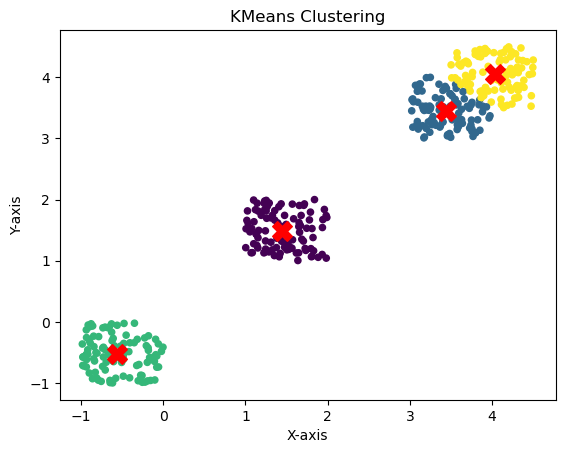

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of all points, colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=20)

# Plot centroids as red X's
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)

plt.title("KMeans Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## Assignment 2.3
### Topic: K-Means clustering - setting the number of cluster centroids (2 points)

Set the number of cluster centroids to *optimal number* of clusters.
The optimal number of clusters can be seen by examining the distribution of points using the figure.

In [55]:
from sklearn.cluster import KMeans

# Set optimal number of clusters
optimal_clusters = 4
kmeans_opt = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_opt.fit(X)

# Retrieve centroids
centroids = kmeans_opt.cluster_centers_

print(f"Number of centroids {len(centroids)} and positions: {centroids}")

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of centroids 4 and positions: [[ 1.45006437  1.49082198]
 [ 3.43633171  3.44365322]
 [-0.5619111  -0.51698292]
 [ 4.03954969  4.04154781]]


#### Visualize: Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated centroids are plotted
Hint: `plt.scatter`

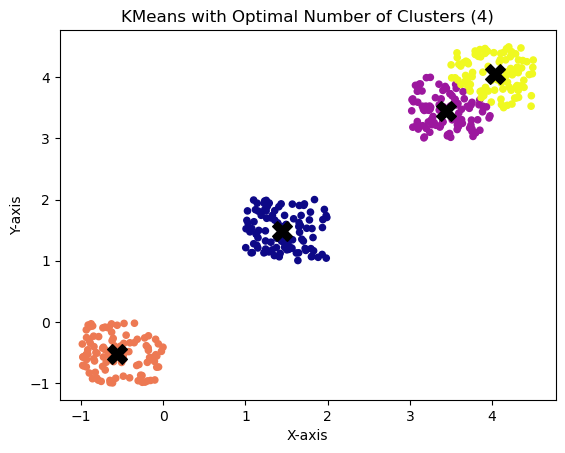

In [58]:
import matplotlib.pyplot as plt

# Scatter plot of all points colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=kmeans_opt.labels_, cmap='plasma', s=20)

# Plot centroids as black X's
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200)

plt.title("KMeans with Optimal Number of Clusters (4)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## Assignment 2.4:
### Topic: Cluster distances as a line diagram (1 p)

Let's plot the average distances of the points of the clusters from the center of the cluster.
* implement the *k_mean_distance()* function given at the beginning of this document is used for drawing


Average distances from centroids: [0.3827715050848796, 0.3376514914004973, 0.38039806308855684, 0.3644240108988514]


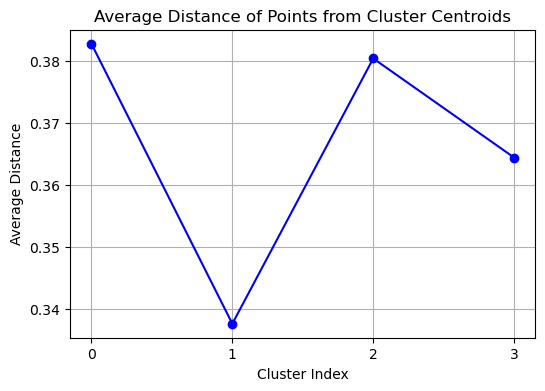

In [61]:
# TODO: Calculate and plot the average distances of cluster points from the cluster centroid
distances_from_center = []

# Loop over each centroid
for i, (cx, cy) in enumerate(centroids):
    avg_dist = k_mean_distance(X, cx, cy, i, kmeans_opt.labels_)
    distances_from_center.append(avg_dist)

print("Average distances from centroids:", distances_from_center)

plt.figure(figsize=(6, 4))
plt.plot(distances_from_center, marker='o', linestyle='-', color='blue')
plt.title("Average Distance of Points from Cluster Centroids")
plt.xlabel("Cluster Index")
plt.ylabel("Average Distance")
plt.xticks(range(len(centroids)))  # 0,1,2,3 for 4 clusters
plt.grid(True)
plt.show()